In [1]:
#%matplotlib widget
%matplotlib inline

In [2]:
# initialization
from rayoptics.environment import *
from rayoptics.optical.model_enums import DecenterType as dec

In [3]:
root_pth = Path(rayoptics.__file__).resolve().parent

In [4]:
opm = OpticalModel()
sm = opm.seq_model
osp = opm.optical_spec

### Define first order aperture and field for model

In [5]:
osp.pupil = PupilSpec(osp, key=['object', 'pupil'], value=1.)
osp.field_of_view = FieldSpec(osp, key=['object', 'angle'], flds=[0.])
osp.spectral_region = WvlSpec([(555.0, 1.0)], ref_wl=0)

### Enter sequential model

In [6]:
opm.radius_mode = True

sm.gaps[0].thi=1e10

opm.add_dummy_plane(t=5.0)
sm.set_stop()

opm.add_mirror(t=-5.0)
sm.ifcs[2].decenter = srf.DecenterData(dec.BEND, alpha=60.)

opm.add_mirror(t=5.0)
sm.ifcs[3].decenter = srf.DecenterData(dec.BEND, alpha=-60.)

opm.add_mirror(t=-5.0)
sm.ifcs[4].decenter = srf.DecenterData(dec.BEND, alpha=-45.)

In [7]:
opm.update_model()

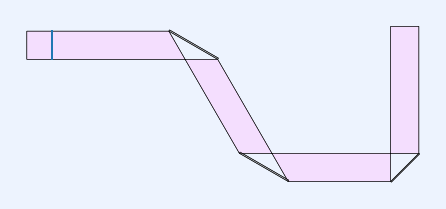

In [8]:
layout_plt = plt.figure(FigureClass=LensLayoutFigure, opt_model=opm).plot()

In [9]:
opm.ele_model.list_elements()

0: DummyInterface (DummyInterface): Surface(profile=Spherical(c=0.0), interact_mode=transmit)
1: AirGap (AirGap): Gap(t=5.0, medium=Air)
2: Mirror (Mirror): Mirror: Spherical(c=0.0), t=0.0500, sd=1.0000
3: AirGap (AirGap): Gap(t=-5.0, medium=Air)
4: Mirror (Mirror): Mirror: Spherical(c=0.0), t=0.0500, sd=1.0000
5: AirGap (AirGap): Gap(t=5.0, medium=Air)
6: Mirror (Mirror): Mirror: Spherical(c=0.0), t=0.0354, sd=0.7071
7: AirGap (AirGap): Gap(t=-5.0, medium=Air)


In [10]:
for i,trfm in enumerate(sm.gbl_tfrms):
    print("{}: {:12.7g} {:12.7g} {:12.7g}".format(i, trfm[1][0], trfm[1][1], trfm[1][2]))

0:            0            0       -1e+10
1:            0            0            0
2:            0            0            5
3:            0    -4.330127          7.5
4:            0    -4.330127         12.5
5:            0     0.669873         12.5


In [11]:
pt0 = np.array([0., 0., 0.])
dir0 = np.array([0., 0., 1.])
wvl = sm.central_wavelength()
oar = rt.trace(sm, pt0, dir0, wvl)
list_ray(oar[0])

            X            Y            Z           L            M            N               Len
  0:      0.00000      0.00000            0     0.000000     0.000000     1.000000        1e+10
  1:      0.00000      0.00000            0     0.000000     0.000000     1.000000            5
  2:      0.00000      0.00000            0     0.000000    -0.866025    -0.500000            5
  3:      0.00000      0.00000            0     0.000000    -0.866025     0.500000            5
  4:      0.00000      0.00000            0     0.000000     0.707107    -0.707107            5
  5:      0.00000      0.00000            0     0.000000     0.000000    -1.000000            0


In [12]:
tfrms = sm.gbl_tfrms
print("            X            Y            Z          SRL"
      "           SRM          SRN")
for i, r in enumerate(oar[mc.ray][0:]):
    rot, trns = tfrms[i]
    p = rot.dot(r[mc.p]) + trns
    snr = rot.dot(r[mc.nrml])
    print("{:3d}: {:12.5f} {:12.5f} {:12.5g} {:4.0f} {:12.6f} {:12.6f} {:12.6f}"
          .format(i, p[0], p[1], p[2], sm.z_dir[i], snr[0], snr[1], snr[2]))

            X            Y            Z          SRL           SRM          SRN
  0:      0.00000      0.00000       -1e+10    1     0.000000     0.000000     1.000000
  1:      0.00000      0.00000            0    1     0.000000     0.000000     1.000000
  2:      0.00000      0.00000            5   -1     0.000000     0.866025     0.500000
  3:      0.00000     -4.33013          7.5    1     0.000000     0.866025     0.500000
  4:      0.00000     -4.33013         12.5   -1     0.000000    -0.707107     0.707107
  5:      0.00000      0.66987         12.5   -1     0.000000    -1.000000     0.000000


In [13]:
list_ray(oar,tfrms=sm.gbl_tfrms)

            X            Y            Z           L            M            N               Len
  0:      0.00000      0.00000       -1e+10     0.000000     0.000000     1.000000        1e+10
  1:      0.00000      0.00000            0     0.000000     0.000000     1.000000            5
  2:      0.00000      0.00000            5     0.000000    -0.866025     0.500000            5
  3:      0.00000     -4.33013          7.5     0.000000     0.000000     1.000000            5
  4:      0.00000     -4.33013         12.5     0.000000     1.000000     0.000000            5
  5:      0.00000      0.66987         12.5     0.000000     1.000000    -0.000000            0


In [14]:
sm.z_dir

[1.0, 1.0, -1.0, 1.0, -1.0, -1.0]

In [15]:
sm.list_decenters()

0 Gap(t=10000000000.0, medium=Air)
1 Gap(t=5.0, medium=Air)
2 Gap(t=-5.0, medium=Air)
  'BEND': Decenter: array([0., 0., 0.]), Tilt: array([60.,  0.,  0.])
3 Gap(t=5.0, medium=Air)
  'BEND': Decenter: array([0., 0., 0.]), Tilt: array([-60.,   0.,   0.])
4 Gap(t=-5.0, medium=Air)
  'BEND': Decenter: array([0., 0., 0.]), Tilt: array([-45.,   0.,   0.])


In [16]:
opm.save_model('Tilted mirrors')

In [17]:
opm = open_model(root_pth/"codev/tests/folded_lenses.seq")
sm = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model

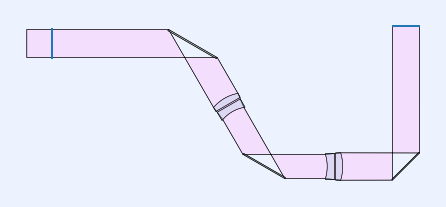

In [18]:
layout_plt = plt.figure(FigureClass=LensLayoutFigure, opt_model=opm).plot()

In [19]:
for i,s in enumerate(sm.ifcs):
    print(i, sm.z_dir[i], s.profile_cv)

0 1.0 0.0
1 1.0 0.0
2 -1.0 0.0
3 -1.0 -0.67
4 -1.0 0.0
5 -1.0 0.0
6 -1.0 -0.77095
7 1.0 0.0
8 1.0 -0.67
9 1.0 0.0
10 1.0 0.0
11 1.0 -0.59225
12 -1.0 0.0
13 -1.0 0.0


In [20]:
em = opm.ele_model
em.list_elements()

0: Aperture Stop (DummyInterface): Surface(profile=Spherical(c=0.0), interact_mode=transmit)
1: AirGap Aperture Stop-M1 (AirGap): Gap(t=5.0, medium=Air)
2: M1 (Mirror): Mirror: Spherical(c=0.0), t=0.0500, sd=1.0000
3: AirGap M1-E1 (AirGap): Gap(t=-2.25, medium=Air)
4: E1 (Element): Element: Spherical(c=-0.67), Spherical(c=0.0), t=-0.2500, sd=0.5000, glass: N-BK7
5: AirGap E1-E2 (AirGap): Gap(t=-0.05, medium=Air)
6: E2 (Element): Element: Spherical(c=0.0), Spherical(c=-0.77095), t=-0.2500, sd=0.4712, glass: N-BK7
7: AirGap E2-M3 (AirGap): Gap(t=-2.25, medium=Air)
8: M3 (Mirror): Mirror: Spherical(c=0.0), t=0.0431, sd=0.8620
9: AirGap M3-E3 (AirGap): Gap(t=2.25, medium=Air)
10: E3 (Element): Element: Spherical(c=-0.67), Spherical(c=0.0), t=0.2500, sd=0.4596, glass: N-BK7
11: AirGap E3-E4 (AirGap): Gap(t=0.05, medium=Air)
12: E4 (Element): Element: Spherical(c=0.0), Spherical(c=-0.59225), t=0.2500, sd=0.4852, glass: N-BK7
13: AirGap E4-M5 (AirGap): Gap(t=2.25, medium=Air)
14: M5 (Mirror):

In [21]:
sm.list_model()

             c            t        medium     mode   zdr      sd
 Obj:     0.000000  1.00000e+11       air   transmit  1      0.0000
Stop:     0.000000      5.00000       air   transmit  1     0.50000
   2:     0.000000     -2.25000       air    reflect -1      1.0000
   3:    -0.670000    -0.250000     N-BK7   transmit -1     0.50000
   4:     0.000000   -0.0500000       air   transmit -1     0.48040
   5:     0.000000    -0.250000     N-BK7   transmit -1     0.47123
   6:    -0.770950     -2.25000       air   transmit -1     0.43242
   7:     0.000000      2.25000       air    reflect  1     0.86202
   8:    -0.670000     0.250000     N-BK7   transmit  1     0.42812
   9:     0.000000    0.0500000       air   transmit  1     0.45957
  10:     0.000000     0.250000     N-BK7   transmit  1     0.46726
  11:    -0.592250      2.25000       air   transmit  1     0.48523
  12:     0.000000     -5.00000       air    reflect -1     0.68285
 Img:     0.000000      0.00000             transmi

In [22]:
m1 = em.elements[2]
str(m1)

'Mirror: Spherical(c=0.0), t=0.0500, sd=1.0000'

In [23]:
m1.tfrm

(array([[ 1.       ,  0.       ,  0.       ],
        [ 0.       ,  0.5      ,  0.8660254],
        [ 0.       , -0.8660254,  0.5      ]]), array([0., 0., 5.]))

In [24]:
m2 = em.elements[3]

In [25]:
str(m2)

'Gap(t=-2.25, medium=Air)'

In [26]:
m2.tfrm

(array([[ 1.       ,  0.       ,  0.       ],
        [ 0.       ,  0.5      ,  0.8660254],
        [ 0.       , -0.8660254,  0.5      ]]), array([0., 0., 5.]))

In [27]:
for i,e in enumerate(em.elements):
    ri = e.reference_interface()
    rifc_indx = sm.ifcs.index(ri)
    print(i, e.label, ri.interact_mode, e.tfrm[0].T[2], e.reference_interface().profile.normal(np.array([0., 0., 0.])))

0 Aperture Stop transmit [0. 0. 1.] [-0. -0.  1.]
1 AirGap Aperture Stop-M1 transmit [0. 0. 1.] [-0. -0.  1.]
2 M1 reflect [0.        0.8660254 0.5      ] [-0. -0.  1.]
3 AirGap M1-E1 reflect [0.        0.8660254 0.5      ] [-0. -0.  1.]
4 E1 transmit [ 0.         0.8660254 -0.5      ] [0. 0. 1.]
5 AirGap E1-E2 transmit [ 0.         0.8660254 -0.5      ] [-0. -0.  1.]
6 E2 transmit [ 0.         0.8660254 -0.5      ] [-0. -0.  1.]
7 AirGap E2-M3 transmit [ 0.         0.8660254 -0.5      ] [0. 0. 1.]
8 M3 reflect [0.        0.8660254 0.5      ] [-0. -0.  1.]
9 AirGap M3-E3 reflect [0.        0.8660254 0.5      ] [-0. -0.  1.]
10 E3 transmit [ 0.00000000e+00 -1.48741681e-17  1.00000000e+00] [0. 0. 1.]
11 AirGap E3-E4 transmit [ 0.00000000e+00 -1.48741681e-17  1.00000000e+00] [-0. -0.  1.]
12 E4 transmit [ 0.00000000e+00 -1.48741681e-17  1.00000000e+00] [-0. -0.  1.]
13 AirGap E4-M5 transmit [ 0.00000000e+00 -1.48741681e-17  1.00000000e+00] [0. 0. 1.]
14 M5 reflect [ 0.         -0.70710678

In [28]:
for i,e in enumerate(em.elements):
    ri = e.reference_interface()
    rifc_indx = sm.ifcs.index(ri)
    print(i, e.label, ri.interact_mode, sm.z_dir[rifc_indx])

0 Aperture Stop transmit 1.0
1 AirGap Aperture Stop-M1 transmit 1.0
2 M1 reflect -1.0
3 AirGap M1-E1 reflect -1.0
4 E1 transmit -1.0
5 AirGap E1-E2 transmit -1.0
6 E2 transmit -1.0
7 AirGap E2-M3 transmit -1.0
8 M3 reflect 1.0
9 AirGap M3-E3 reflect 1.0
10 E3 transmit 1.0
11 AirGap E3-E4 transmit 1.0
12 E4 transmit 1.0
13 AirGap E4-M5 transmit 1.0
14 M5 reflect -1.0
15 AirGap M5-Image reflect -1.0
16 Image transmit -1.0


In [29]:
sm.list_model()

             c            t        medium     mode   zdr      sd
 Obj:     0.000000  1.00000e+11       air   transmit  1      0.0000
Stop:     0.000000      5.00000       air   transmit  1     0.50000
   2:     0.000000     -2.25000       air    reflect -1      1.0000
   3:    -0.670000    -0.250000     N-BK7   transmit -1     0.50000
   4:     0.000000   -0.0500000       air   transmit -1     0.48040
   5:     0.000000    -0.250000     N-BK7   transmit -1     0.47123
   6:    -0.770950     -2.25000       air   transmit -1     0.43242
   7:     0.000000      2.25000       air    reflect  1     0.86202
   8:    -0.670000     0.250000     N-BK7   transmit  1     0.42812
   9:     0.000000    0.0500000       air   transmit  1     0.45957
  10:     0.000000     0.250000     N-BK7   transmit  1     0.46726
  11:    -0.592250      2.25000       air   transmit  1     0.48523
  12:     0.000000     -5.00000       air    reflect -1     0.68285
 Img:     0.000000      0.00000             transmi

In [30]:
m2.tfrm[0][2]

array([ 0.       , -0.8660254,  0.5      ])

In [31]:
d = m2.tfrm[0].dot(np.array([0., 0., 1.])); d

array([0.       , 0.8660254, 0.5      ])

In [32]:
m2.tfrm[0].T[2]

array([0.       , 0.8660254, 0.5      ])

In [33]:
m2.tfrm[0].transpose()[2]

array([0.       , 0.8660254, 0.5      ])

In [34]:
m2_indx = sm.ifcs.index(m2.reference_interface()); m2_indx

2

In [35]:
sm.gbl_tfrms[m2_indx][0].T

array([[ 1.       ,  0.       ,  0.       ],
       [ 0.       ,  0.5      , -0.8660254],
       [ 0.       ,  0.8660254,  0.5      ]])

In [36]:
m2.reference_interface().profile.normal(np.array([0., 0., 0.]))

array([-0., -0.,  1.])

In [37]:
sm.z_dir

[1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0]

In [38]:
sm.list_model()

             c            t        medium     mode   zdr      sd
 Obj:     0.000000  1.00000e+11       air   transmit  1      0.0000
Stop:     0.000000      5.00000       air   transmit  1     0.50000
   2:     0.000000     -2.25000       air    reflect -1      1.0000
   3:    -0.670000    -0.250000     N-BK7   transmit -1     0.50000
   4:     0.000000   -0.0500000       air   transmit -1     0.48040
   5:     0.000000    -0.250000     N-BK7   transmit -1     0.47123
   6:    -0.770950     -2.25000       air   transmit -1     0.43242
   7:     0.000000      2.25000       air    reflect  1     0.86202
   8:    -0.670000     0.250000     N-BK7   transmit  1     0.42812
   9:     0.000000    0.0500000       air   transmit  1     0.45957
  10:     0.000000     0.250000     N-BK7   transmit  1     0.46726
  11:    -0.592250      2.25000       air   transmit  1     0.48523
  12:     0.000000     -5.00000       air    reflect -1     0.68285
 Img:     0.000000      0.00000             transmi

In [39]:
pm.list_lens()

       ax_ray_ht    ax_ray_slp
 0:            0         5e-12
 1:          0.5         5e-12
 2:          0.5         5e-12
 3:          0.5     -0.173622
 4:      0.47141     -0.173622
 5:      0.46273     -0.173622
 6:      0.43414  -0.000154742
 7:      0.43379  -0.000154742
 8:      0.43345      0.150356
 9:       0.4582      0.150356
10:      0.46572      0.150356
11:      0.49048  -0.000194982
12:      0.49004  -0.000194982
13:      0.48906  -0.000194982

       pr_ray_ht    pr_ray_slp
 0:  -1.7455e+09     0.0174551
 1:            0     0.0174551
 2:     0.087275     0.0174551
 3:      0.12655    -0.0264883
 4:      0.12219    -0.0264883
 5:      0.12086    -0.0264883
 6:       0.1165     0.0200614
 7:      0.16164     0.0200614
 8:      0.20678     0.0918638
 9:       0.2219     0.0918638
10:       0.2265     0.0918638
11:      0.24162     0.0176979
12:      0.28144     0.0176979
13:      0.36993     0.0176979

            power           tau        index    type
 0:            

In [40]:
pupil = [0., 1.]
fi = 0
wl = osp.spectral_region.reference_wvl
fld, wvl, foc = osp.lookup_fld_wvl_focus(fi, wl)
ray, ray_op, wvl = trace_base(opm, pupil, fld, wvl)
list_ray(ray)

            X            Y            Z           L            M            N               Len
  0:      0.00000      0.00000            0     0.000000     0.000000     1.000000        1e+11
  1:      0.00000      0.50000            0     0.000000     0.000000     1.000000        4.134
  2:      0.00000      1.00000            0     0.000000    -0.866025    -0.500000       3.2023
  3:      0.00000      0.50000    -0.086242     0.000000    -0.118848    -0.992913      0.16493
  4:      0.00000      0.48040            0     0.000000    -0.180443    -0.983585     0.050834
  5:      0.00000      0.47123            0     0.000000    -0.118848    -0.992913      0.32652
  6:      0.00000      0.43242    -0.074201     0.000000    -0.000985    -1.000000       1.4293
  7:      0.00000      0.86202            0     0.000000    -0.866518     0.499147       2.9338
  8:      0.00000      0.42812    -0.062719     0.000000     0.100059     0.994981       0.3143
  9:      0.00000      0.45957          